<a href="https://colab.research.google.com/github/TheMathAI/MATH208_PROJECT/blob/main/MATH_208_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggpubr")

In [43]:
# library
library(tidyverse)
library(ggplot2)
library(ggpubr)

In [44]:
# taking data from github to a dataframe
cpu_gpu_data <- read.csv("https://raw.githubusercontent.com/TheMathAI/MATH208_PROJECT/main/chip_dataset.csv")

In [45]:
# replacing columns names to get initial columns names
colnames(cpu_gpu_data) <- c('ID', 'Product', 'Type', 'Release_Date', 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)', 'Foundry', 'Vendor', 'FP16_GFLOPS', 'FP32_GFLOPS', 'FP64_GFLOPD')

In [46]:
head(cpu_gpu_data)

,ID,Product,Type,Release_Date,Process_Size_(nm),TDP_(W),Die_Size_(mm_square),Transistors_(million),Freq_(MHz),Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPD
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77,122,2200,Unknown,AMD,NA,NA,NA
2,1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192,4800,3200,Unknown,AMD,NA,NA,NA
3,2,Intel Core i5-1145G7,CPU,2020-09-02,10,28,NA,NA,2600,Intel,Intel,NA,NA,NA
4,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160,1400,1800,Intel,Intel,NA,NA,NA
5,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258,758,3700,Unknown,AMD,NA,NA,NA
6,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160,1400,2400,Intel,Intel,NA,NA,NA


In [47]:
# remove all rows with NA values between the column 5 and 9 inclunding 5,9.
cpu_gpu_data_no_NA <- cpu_gpu_data[complete.cases(cpu_gpu_data[ , 5:9]),]

In [48]:
# Count by group (CPU and GPU) with proportion
cpu_gpu_data_count <- cpu_gpu_data_no_NA %>% group_by(Type) %>% summarise(count=n()) %>%
 mutate(prop=count/sum(count)) %>% arrange(desc(count))

cpu_gpu_data_count

Type,count,prop
<chr>,<int>,<dbl>
GPU,1879,0.5490941
CPU,1543,0.4509059


In [49]:
# It contains min, max, mean, median, sd, IQR, Q1 and Q3. Feel free to add 
#other functions that would give us more information on the data
summary_cpu_gpu <- cpu_gpu_data_no_NA %>% group_by(Type) %>% select(Type, 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)') %>%
  summarise_all(list(Min=min, Max=max,Avg=mean, Med=median, Sd=sd, iqr=IQR, Q1=~quantile(.,probs=0.25), Q3=~quantile(.,probs=0.75))) %>% 
  pivot_longer(cols=starts_with(c('Process','TDP','Die','Transistors','Freq')), names_to = "Measure", values_drop_na = TRUE)

In [50]:
# pivoting wider to compare more easily the difference between CPU and GPU
summary_cpu_gpu_wide <- summary_cpu_gpu %>% pivot_wider(names_from = Type, values_from = value)

# Q1

## a)

**Process Size**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Process_Size_(nm)_Min,7.00000,7.00000
Process_Size_(nm)_Max,180.00000,250.00000
Process_Size_(nm)_Avg,60.47699,46.94838
Process_Size_(nm)_Med,45.00000,40.00000
Process_Size_(nm)_Sd,42.99468,38.51769
Process_Size_(nm)_iqr,58.00000,27.00000
Process_Size_(nm)_Q1,32.00000,28.00000
Process_Size_(nm)_Q3,90.00000,55.00000


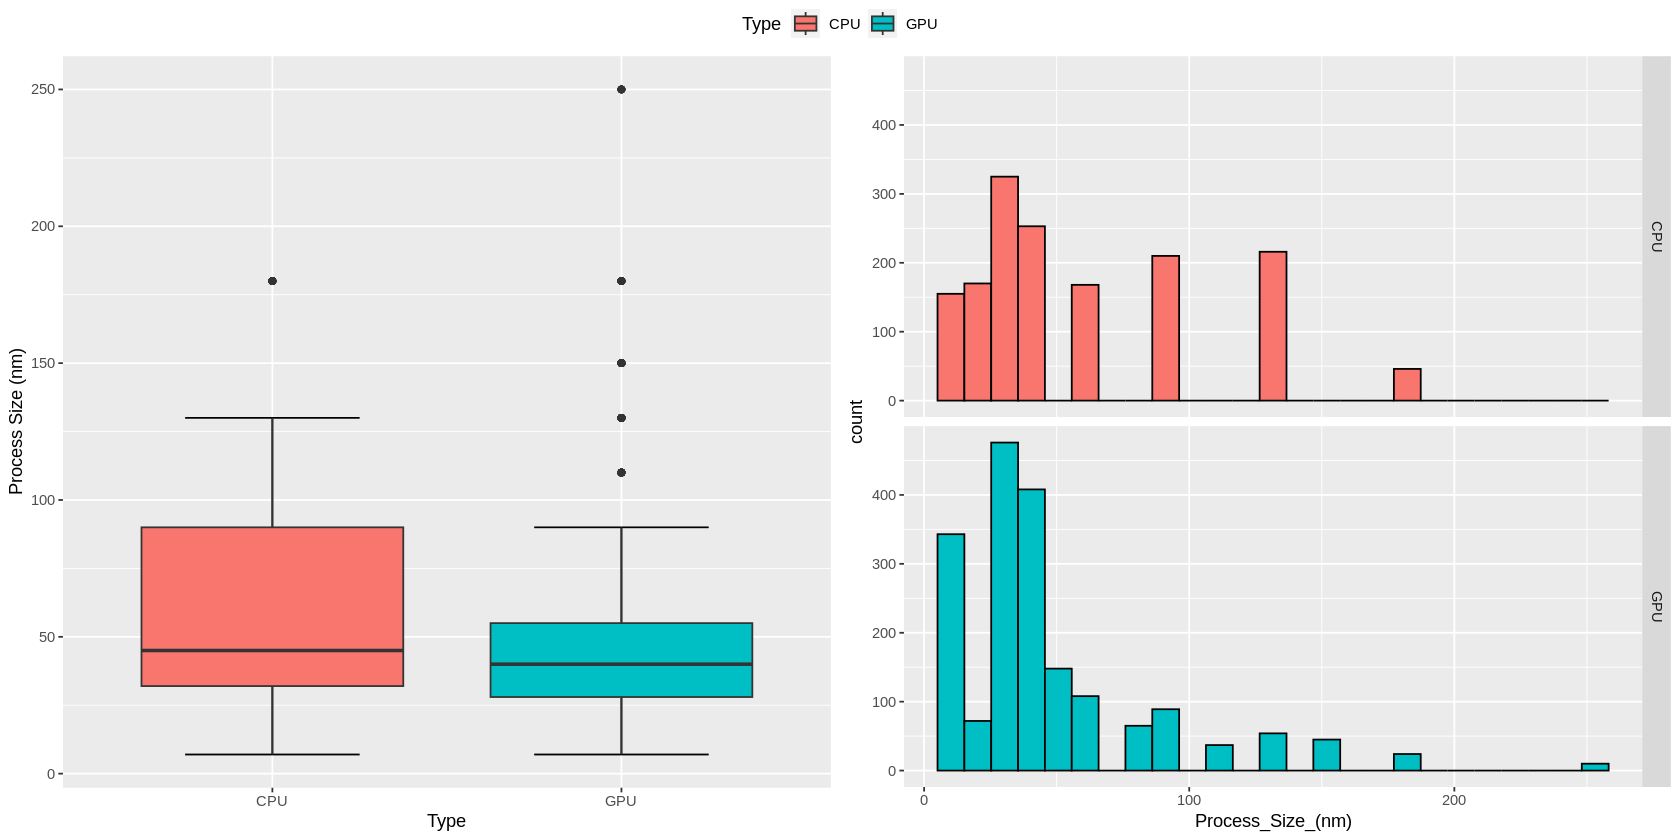

In [51]:
# Plot for Process_Size

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Process_Size_(nm)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Process_Size_(nm)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Process"))

**TDP (W)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
TDP_(W)_Min,1.00000,2.00000
TDP_(W)_Max,300.00000,900.00000
TDP_(W)_Avg,73.43422,92.20436
TDP_(W)_Med,65.00000,55.00000
TDP_(W)_Sd,47.64056,96.20399
TDP_(W)_iqr,58.00000,95.00000
TDP_(W)_Q1,37.00000,30.00000
TDP_(W)_Q3,95.00000,125.00000


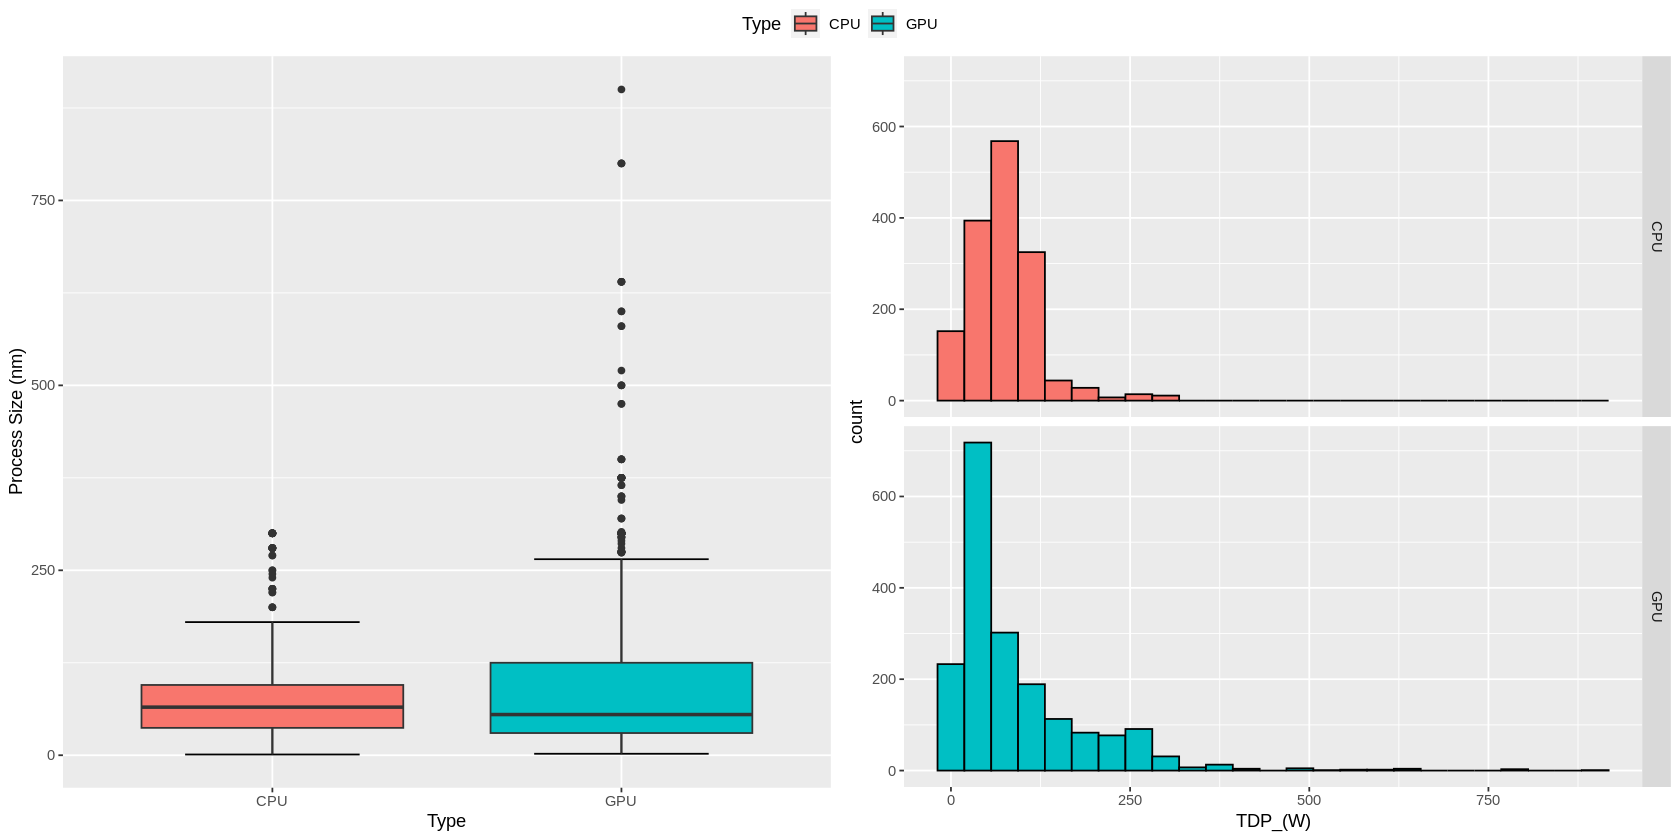

In [52]:
# Plot for TDP_(W)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`TDP_(W)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`TDP_(W)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "TDP_"))

**Die Size (mm^2)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Die_Size_(mm_square)_Min,1.00000,56.0000
Die_Size_(mm_square)_Max,684.00000,826.0000
Die_Size_(mm_square)_Avg,169.55023,225.0117
Die_Size_(mm_square)_Med,156.00000,169.0000
Die_Size_(mm_square)_Sd,80.76499,156.2681
Die_Size_(mm_square)_iqr,111.00000,178.0000
Die_Size_(mm_square)_Q1,109.00000,116.0000
Die_Size_(mm_square)_Q3,220.00000,294.0000


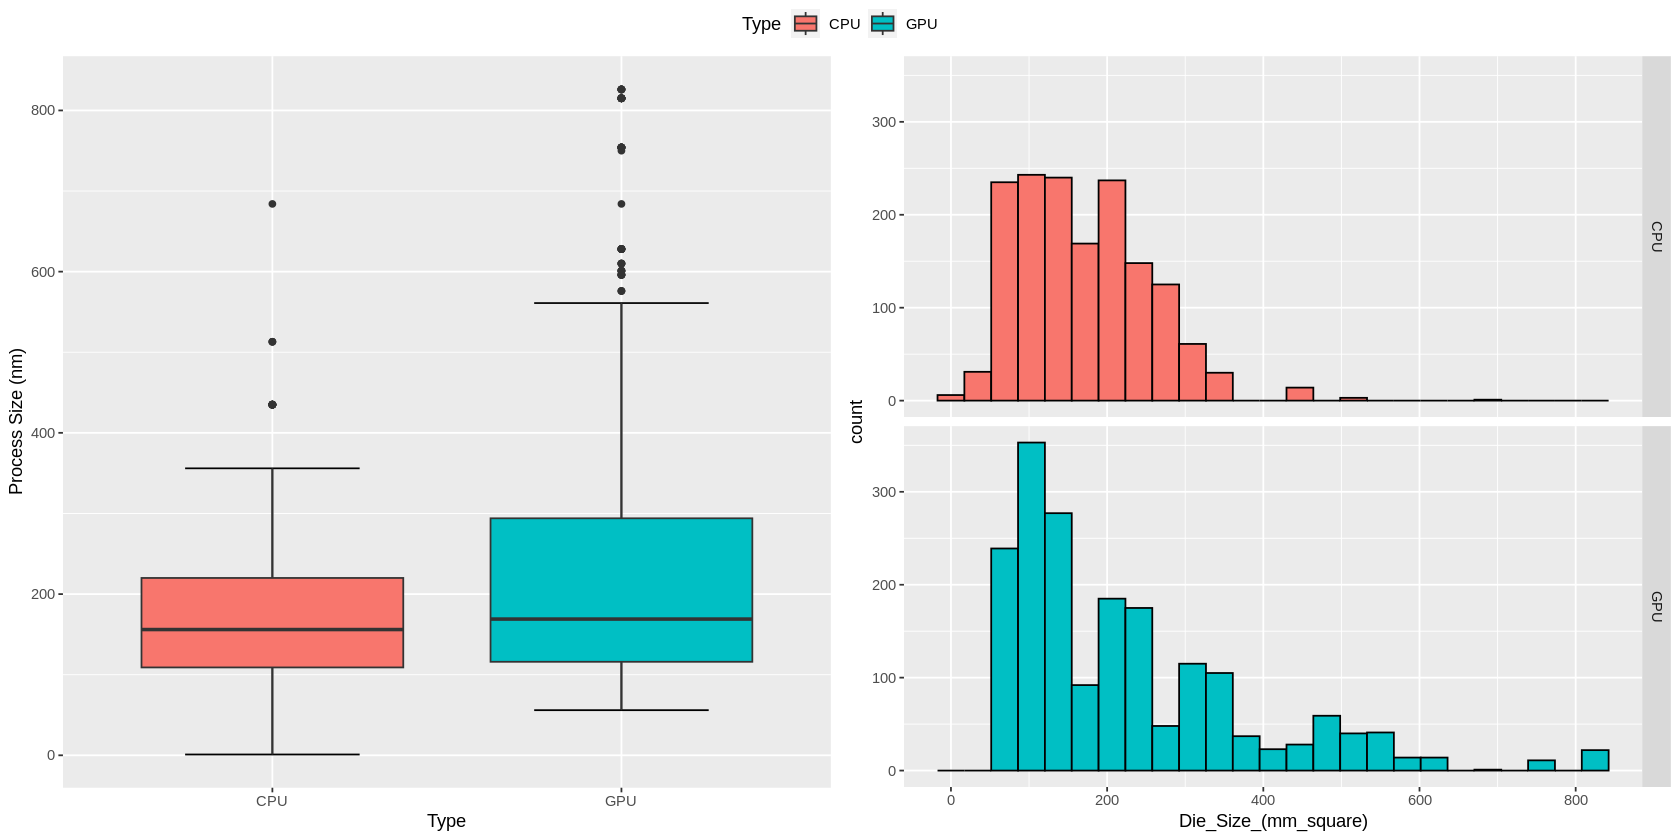

In [53]:
# Plot for Die_Size_(mm_square)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Die_Size_(mm_square)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Die_Size_(mm_square)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Die_Size"))

**Transistors (million)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Transistors_(million)_Min,37.000,10.000
Transistors_(million)_Max,19200.000,54200.000
Transistors_(million)_Avg,1088.541,3045.864
Transistors_(million)_Med,450.000,1170.000
Transistors_(million)_Sd,1875.182,5426.407
Transistors_(million)_iqr,1075.000,3226.000
Transistors_(million)_Q1,125.000,314.000
Transistors_(million)_Q3,1200.000,3540.000


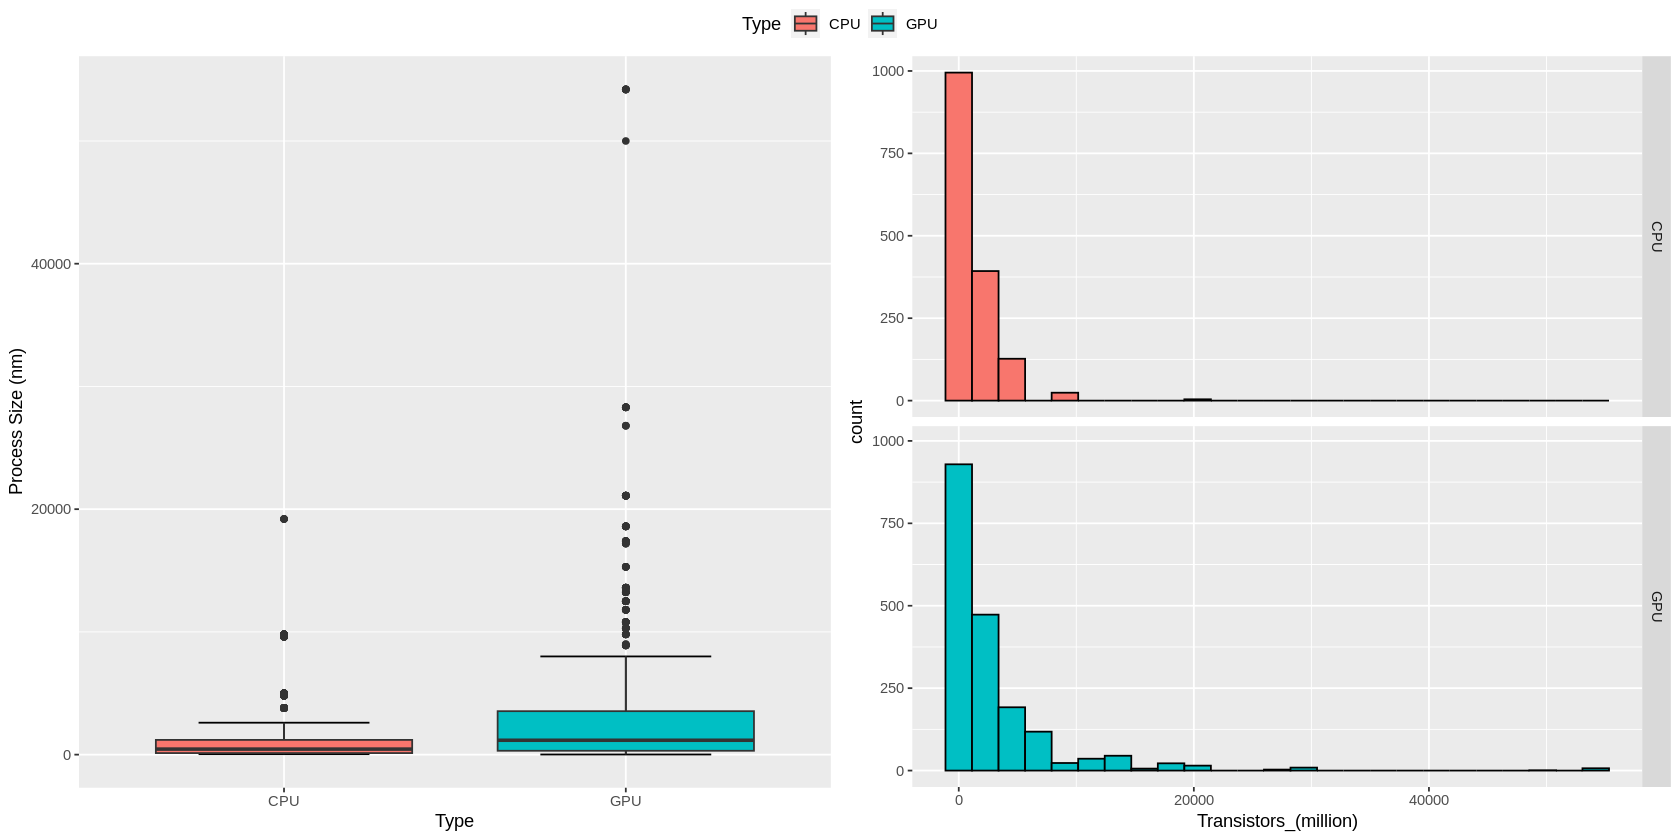

In [54]:
# Plot for Transistors_(million)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Transistors_(million)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Transistors_(million)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Transistors"))

**Freq (MHz)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Freq_(MHz)_Min,600.0000,100.0000
Freq_(MHz)_Max,4700.0000,2321.0000
Freq_(MHz)_Avg,2447.3590,736.5514
Freq_(MHz)_Med,2400.0000,675.0000
Freq_(MHz)_Sd,737.0142,319.3451
Freq_(MHz)_iqr,1100.0000,412.0000
Freq_(MHz)_Q1,1900.0000,513.0000
Freq_(MHz)_Q3,3000.0000,925.0000


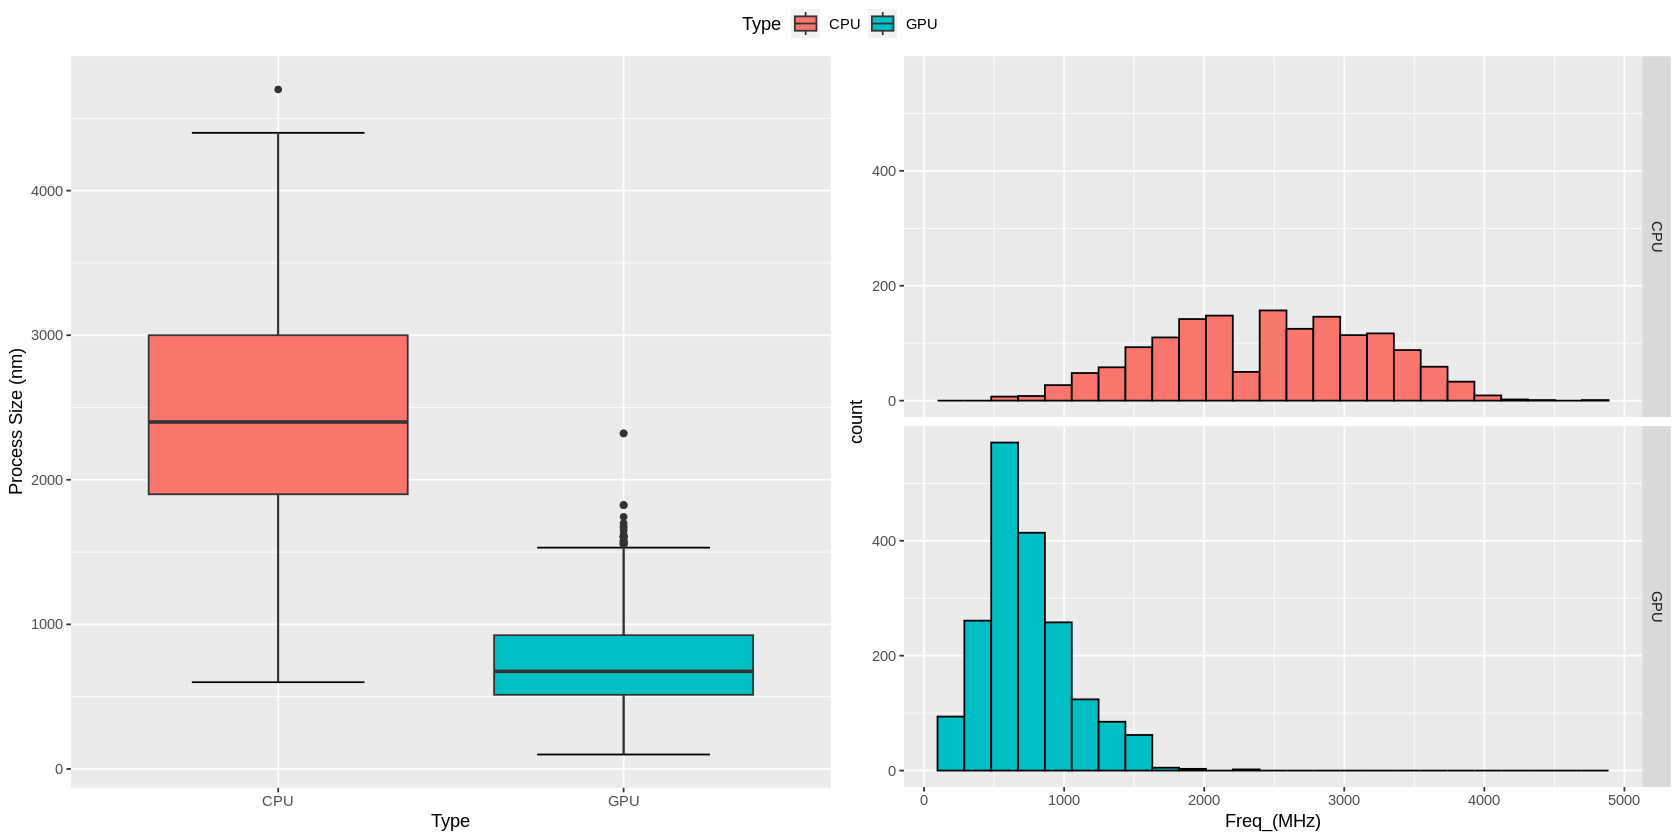

In [55]:
# Plot for Freq_(MHz)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Freq_(MHz)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Freq_(MHz)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Freq"))

## b)

In [59]:
cpu_gpu_data_no_NA_b <- cpu_gpu_data[complete.cases(cpu_gpu_data[ , 10:11]),]

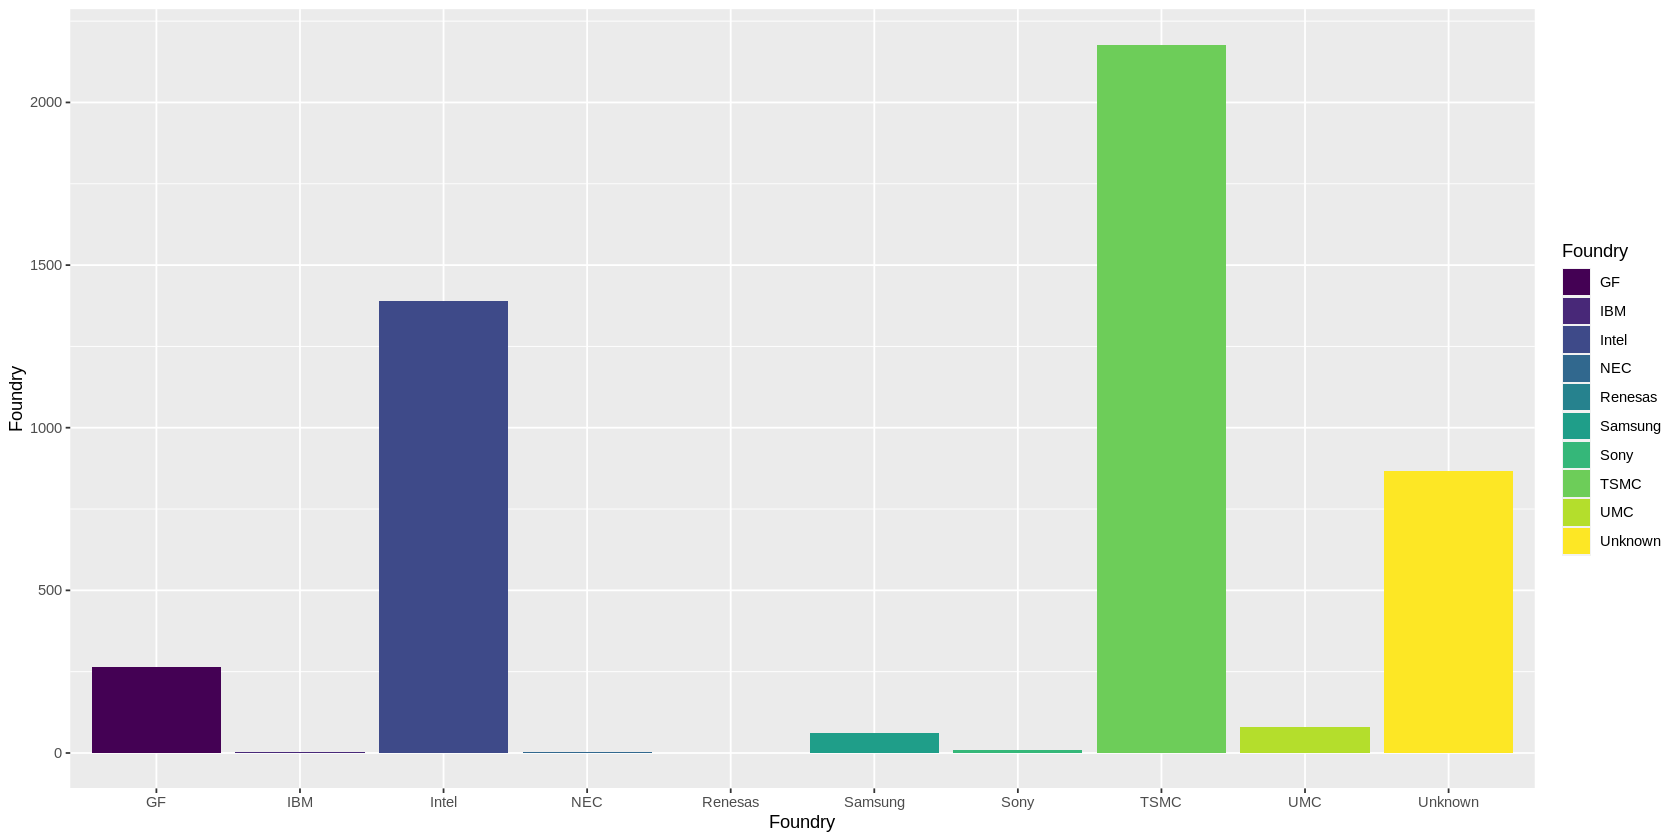

In [62]:
ggplot(cpu_gpu_data_no_NA_b,aes(x=Foundry,fill=Foundry)) +
 geom_bar() + scale_fill_viridis_d() +
 ylab("Foundry")

## c)

# Q2